In [9]:
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame(X, columns=['x', 'y'])


C:\Users\Mikae\AppData\Local\Temp\ipykernel_10180\1408424267.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="x", y="y", palette="tab10")


Text(0.5, 1.0, 'Original Data')

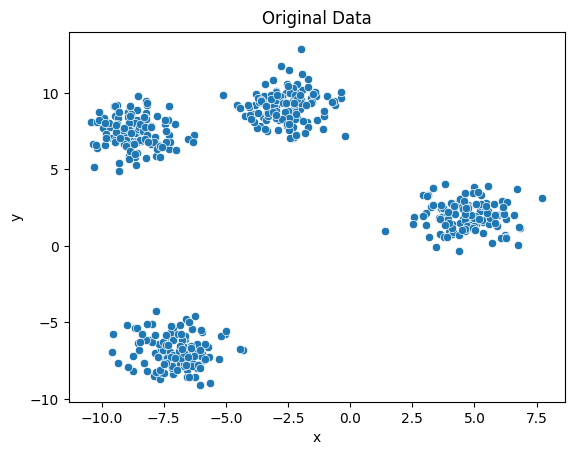

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="x", y="y", palette="tab10")
plt.title('Original Data')


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Center values with std 1
X_scaled = scaler.fit_transform(X)

C:\Users\Mikae\AppData\Local\Temp\ipykernel_10180\887791687.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], palette="tab10")


<Axes: >

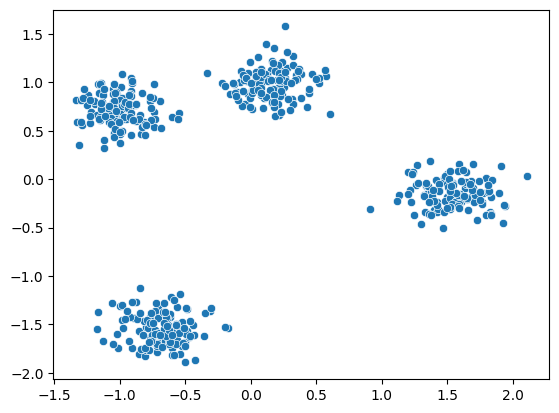

In [13]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], palette="tab10")

In [14]:
from sklearn.cluster import KMeans
# We try to minimize the distance within every cluster
clusters = range(1,10)
# Need to use .inertia_ for the sum of squares method
sum_squared_distance = [KMeans(k, n_init='auto').fit(X_scaled).inertia_ for k in clusters]

sum_squared_distance

[999.9999999999997,
 601.2655029229379,
 116.09567852755524,
 28.786938978873998,
 26.081397669759927,
 23.051764835626003,
 20.47977077590152,
 20.80876096176717,
 16.47112284156063]

Text(0.5, 1.0, 'Elbow/knee Plot')

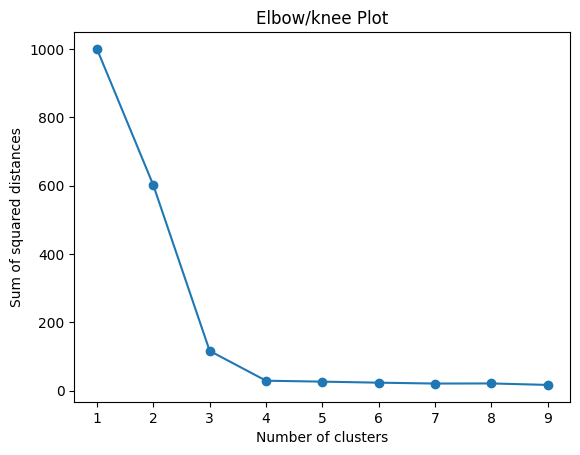

In [17]:
plt.plot(clusters, sum_squared_distance, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow/knee Plot')

Here' we could be tempted to stay at 3, but we know that it's 4, after which the plot flattens.

### Silhouette score

High Silhouette score = many small clusters 

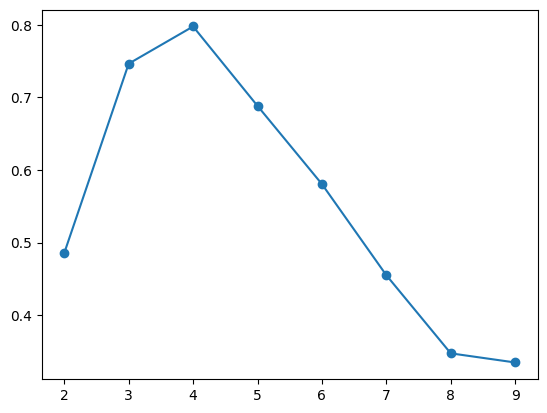

In [18]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init='auto').fit(X_scaled) for k in clusters]

silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in kmeans[1:]]

plt.plot(clusters[1:], silhouette_scores, marker='o')

Shows a maximum value for 4 clusters. Which is a good fit, as we made 4 clusters of blobs.

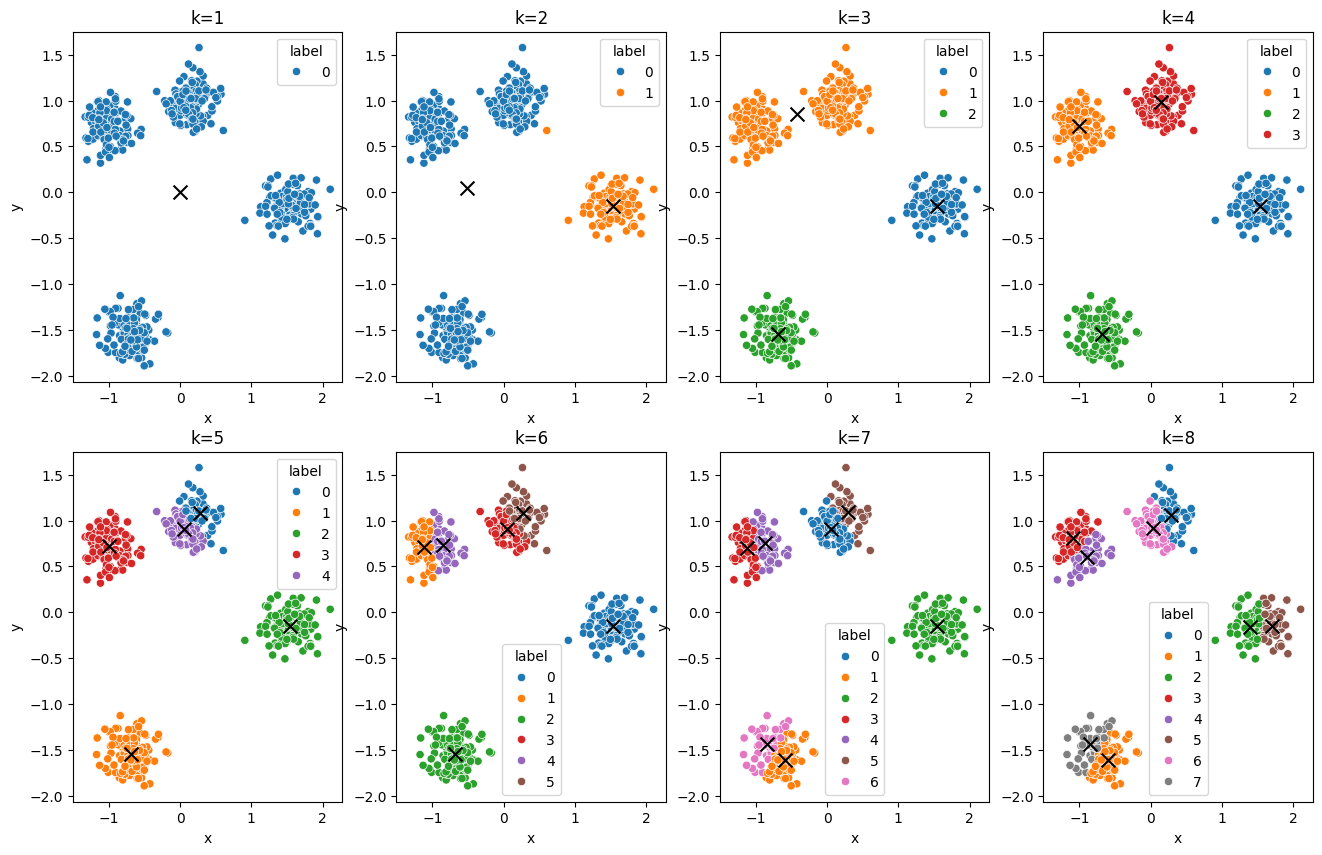

In [23]:
df_plot = pd.DataFrame(X_scaled, columns = ["x","y"])

fig, axes = plt.subplots(2,4,figsize=(16,10))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x", y="y", hue="label", ax=ax, palette="tab10")
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, c='black', marker='x')
    ax.set_title(f'k={i+1}')

In [24]:
# x, y coordinates for third subplot clusters
kmeans[2].cluster_centers_

array([[ 1.53895017, -0.15301193],
       [-0.42704371,  0.85078316],
       [-0.68486276, -1.54855438]])